<a href="https://colab.research.google.com/github/betinhapotter/alura-git/blob/master/Projeto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

dados = pd.read_csv('/content/Customer-Churn.csv')




In [8]:
dados.shape

(7043, 18)

In [9]:
dados.head()


,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [10]:
traducao_dic = {'Sim': 1,
                'Nao': 0}

dadosmodificados = dados [['Conjuge','Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [11]:
#transformação pelo get_dumies

dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                                         axis=1))

#junção dos dados transformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

dados_final.head()





,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,...,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,False,True,False,False


In [12]:
dados_final.shape

(7043, 39)

In [13]:
#DICA
pd.set_option('display.max_columns', 39)

dados_final.head()


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


X = dados de entrada

y = dados de saída


Yi = f(Xi)

In [14]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

#ymaria = ?




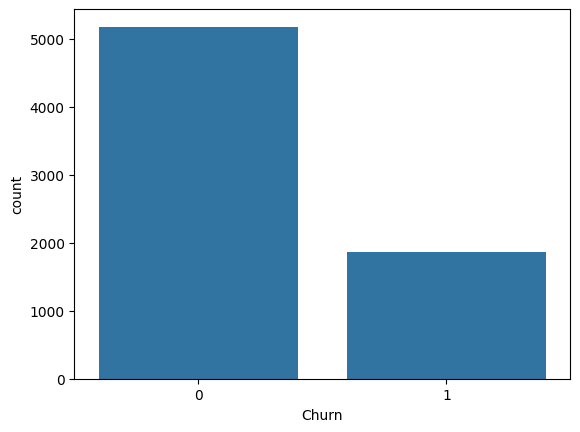

In [15]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [16]:
!pip install -U imbalanced-learn

In [17]:
dados_final.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [18]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [19]:
from imblearn.over_sampling import SMOTE

#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [20]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.03453023, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 , -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
        -0.54480692,  1.88720123]])

In [23]:
X_normalizado[0]

array([ 1.03453023, -0.65401193, -3.05401039,  0.8297975 , -0.43991649,
       -1.27744458, -1.16032292, -0.96332984,  3.05401039, -0.85417615,
        1.38171215, -0.88565976, -0.52592737,  1.00669571, -0.52592737,
       -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
       -0.52592737, -0.72396752,  1.0138687 , -0.52592737, -0.63943864,
        1.2273572 , -0.52592737, -0.79013171,  1.23648892, -0.52592737,
       -0.79607014, -0.56297505,  0.90418382, -0.51424938, -0.52504733,
        1.40641839, -0.54480692, -0.5298852 ])

In [24]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns= X.columns))
Xmaria_normalizado

#Distância Euclidiana

array([[-0.96662231, -0.65401193,  0.32743831,  0.8297975 , -0.43991649,
        -1.31816495, -0.82630172,  1.03806605, -0.32743831, -0.85417615,
        -0.72373975,  1.12910177, -0.52592737,  1.00669571, -0.52592737,
        -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
         1.90140322, -0.72396752, -0.98632101,  1.90140322, -0.63943864,
         1.2273572 , -0.52592737, -0.79013171, -0.80874158, -0.52592737,
         1.25617071, -0.56297505, -1.1059698 ,  1.94458183, -0.52504733,
        -0.71102597, -0.54480692,  1.88720123]])

In [25]:
import numpy as np


In [26]:
a = Xmaria_normalizado

In [27]:
b = X_normalizado[0]

In [28]:
#Comecamos subtraindo
a - b

array([[-2.00115254,  0.        ,  3.3814487 ,  0.        ,  0.        ,
        -0.04072036,  0.3340212 ,  2.00139589, -3.3814487 ,  0.        ,
        -2.10545189,  2.01476153,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.42733059,  0.        , -2.00018971,  2.42733059,  0.        ,
         0.        ,  0.        ,  0.        , -2.0452305 ,  0.        ,
         2.05224086,  0.        , -2.01015362,  2.45883121,  0.        ,
        -2.11744436,  0.        ,  2.41708643]])

In [29]:
#Agora realizamos a exponenciação
np.square(a-b)

array([[4.00461149e+00, 0.00000000e+00, 1.14341953e+01, 0.00000000e+00,
        0.00000000e+00, 1.65814802e-03, 1.11570160e-01, 4.00558550e+00,
        1.14341953e+01, 0.00000000e+00, 4.43292768e+00, 4.05926401e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.89193381e+00, 0.00000000e+00, 4.00075888e+00, 5.89193381e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.18296779e+00, 0.00000000e+00, 4.21169253e+00, 0.00000000e+00,
        4.04071758e+00, 6.04585093e+00, 0.00000000e+00, 4.48357062e+00,
        0.00000000e+00, 5.84230682e+00]])

In [30]:
#somamos
np.sum(np.square(a-b))

84.07574038273466

In [31]:
#Entao tiramos a raiz e temos a distância

np.sqrt(87.78220396143277)

9.369215760213486

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(metric='euclidean')


In [36]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [37]:
predito_knn = knn.predict(X_teste)

predito_knn

array([1, 0, 0, ..., 0, 0, 0])

In [38]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0


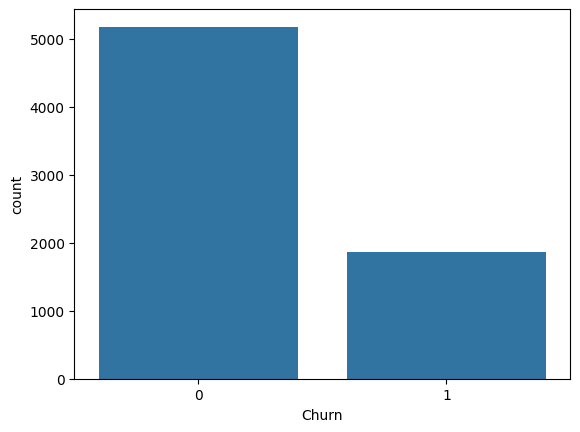

In [39]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [40]:
dados_final.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [41]:
#Ymaria = ?

In [42]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))


In [43]:
def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
    distancias = []

#loop para percorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = dados_maria - dados_clientes[i]            #subtração dos atributos
        soma_quadrado = np.sum(np.square(dist1))    #exponenciação e soma de todos os atributos
        distancias.append(np.sqrt(soma_quadrado))   #raiz quadrada da soma anterior

    return distancias

In [44]:
calcula_distancia(X_normalizado, Xmaria_normalizado, 10)

[9.169282435541762,
 8.742314068192332,
 7.96104771727276,
 9.683687116435184,
 7.35756725091328,
 8.58650261645753,
 8.411628863624525,
 10.145869884558158,
 8.97159048640628,
 7.5587041367106105]

In [45]:
X_treino

array([[-0.96662231, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231,  1.5290241 ,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 ,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023,  1.5290241 , -3.05401039, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ]])

In [46]:
y_treino

1479    0
2377    0
6613    0
6468    0
2668    1
       ..
5218    0
4060    0
1346    1
3454    0
3582    0
Name: Churn, Length: 4930, dtype: int64

In [47]:
np.median(X_treino)

-0.5259273725834717

In [52]:
#biblioteca para criar o modelo machine learning
from sklearn.naive_bayes import BernoulliNB

#criamos o modelo
bnb = BernoulliNB(binarize=--0.52)



In [53]:
bnb.fit(X_treino, y_treino)



BernoulliNB(binarize=0.52)

In [54]:
predito_BNb = bnb.predict(X_teste)

In [55]:
predito_BNb

array([1, 0, 0, ..., 0, 1, 0])

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [59]:
#treinar o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [60]:
#verificar a importância de cada  atributo
dtc.feature_importances_

array([0.03168742, 0.01862901, 0.00064085, 0.02675693, 0.0208788 ,
       0.2056003 , 0.29546501, 0.0061786 , 0.00273035, 0.00747536,
       0.        , 0.04908356, 0.        , 0.01609395, 0.        ,
       0.00722833, 0.01220706, 0.        , 0.01248286, 0.01138295,
       0.0006673 , 0.0095669 , 0.01841631, 0.        , 0.00650511,
       0.00385849, 0.        , 0.00666929, 0.00517146, 0.        ,
       0.00665371, 0.00473251, 0.15803541, 0.00348686, 0.01414378,
       0.01601964, 0.01064163, 0.01091026])

In [61]:
predito_ArvoreDecisao = dtc.predict(X_teste)

predito_ArvoreDecisao

array([1, 0, 0, ..., 1, 0, 0])

In [63]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, predito_knn))

[[1305  218]
 [ 317  273]]


In [64]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1249  274]
 [ 290  300]]


In [65]:
print(confusion_matrix(y_teste, predito_BNb))

[[1058  465]
 [ 120  470]]


In [66]:
from sklearn.metrics import accuracy_score

In [67]:
valores_preditos = [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]

In [68]:
valores_verdadeiros= [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]

In [69]:
mc = confusion_matrix(valores_verdadeiros, valores_preditos)  # Matriz de confusão
mc

array([[4, 2],
       [1, 3]])

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    ax = plt.subplot()
    sns.set(font_scale=1.1)
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)

    label_font = {'size':'12'}
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);

    ax.tick_params(axis='both', which='major', labelsize=10)

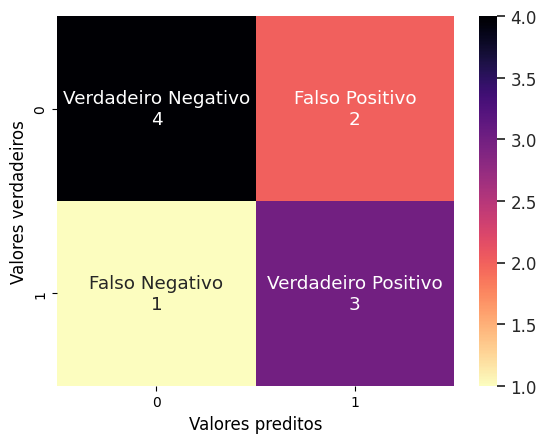

In [71]:
categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

gerando_matriz(mc, labels, categorias, cmap="magma_r")

In [74]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_teste, predito_knn))



[[1305  218]
 [ 317  273]]


In [75]:
print(confusion_matrix(y_teste, predito_BNb))



[[1058  465]
 [ 120  470]]


In [76]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1249  274]
 [ 290  300]]


In [77]:
from sklearn.metrics import accuracy_score
#modelo KNN
print(accuracy_score(y_teste, predito_knn))

0.7468054898248935


In [78]:
#modelo Bernoulli de naive bayes
print(accuracy_score(y_teste, predito_BNb))

0.7231424514907714


In [79]:
#modelo árvore de decisão
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.7330809275911027


In [80]:
from sklearn.metrics import precision_score
#modelo KNN
print(precision_score(y_teste, predito_knn))

0.5560081466395111


In [81]:
#modelo Bernoulli de naive bayes
print(precision_score(y_teste, predito_BNb))

0.5026737967914439


In [82]:
#modelo árvore de decisão
print(precision_score(y_teste, predito_ArvoreDecisao))

0.5226480836236934


In [83]:
from sklearn.metrics import recall_score
#modelo KNN
print(recall_score(y_teste, predito_knn))

0.46271186440677964


In [84]:
#modelo Bernoulli de naive bayes
print(recall_score(y_teste, predito_BNb))

0.7966101694915254


In [85]:
#modelo árvore de decisão
print(recall_score(y_teste, predito_ArvoreDecisao))

0.5084745762711864


In [86]:
#Exemplo - análise das precisões calculadas anteriormente
print('Modelo KNN: ', precision_score(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_teste, predito_BNb))
print('Modelo Árvore de Decisão: ', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.5560081466395111
Modelo Bernoulli de Naive Bayes:  0.5026737967914439
Modelo Árvore de Decisão:  0.5226480836236934
